In [222]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split #数据集分组包

In [223]:
iris = datasets.load_iris()

In [381]:
X = iris.data
y = iris.target

In [382]:
X = X[y<2,:2] #结果为0和1，X为前两个特征
y = y[y<2]#结果为0和1的数据

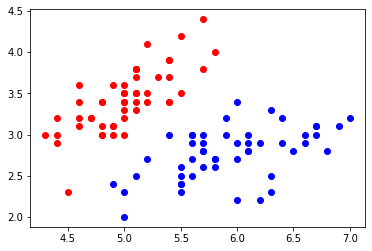

In [356]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.scatter(X[y==2,0],X[y==2,1],color='green')
plt.show()

In [357]:
print(iris.keys()) #查看键

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [358]:
print(iris.feature_names)#查看特征名称

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [359]:
print(iris.target_names)#目标名称

['setosa' 'versicolor' 'virginica']


In [360]:
print(iris.DESCR)#数据集描述

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [361]:
print(iris.filename)#位置

/Users/momo/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/data/iris.csv


In [362]:
data = iris
data_pd = pd.DataFrame(data.data, columns=data.feature_names)
target_map_dict={0:'setosa',1:'versicolor',2:'virginica'} #目标名称字典
data_pd['class'] = data.target #没有的列将新创造一列
data_pd['class'] = data_pd['class'].map(target_map_dict)
data_pd.head()#展示前5行

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [363]:
data_pd.shape#行列数

(150, 5)

In [364]:
data_pd.dtypes #数据格式

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                 object
dtype: object

In [365]:
data_pd.isnull().sum() #空值计算

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [366]:
data_pd.describe() #数据描述

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [367]:
data_pd['class'].describe() #目标数据描述

count        150
unique         3
top       setosa
freq          50
Name: class, dtype: object

In [386]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


class LogisticRegression:
    
    def __init__(self):
        """初始化"""
        self.coef_ = None #回归系数
        self.intercept_ = None #截距
        self._theta = None #所有系数
        
    def _sigmoid(self, t):
        """激活函数"""
        return 1. / (1. + np.exp(-t))
    
    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """
        拟合函数
        
        X_train:训练集
        y_train:训练集
        eta：步长
        n_iters:训练轮数
        """
        assert X_train.shape[0] == y_train.shape[0], 'error!数据集大小不等'
        
        def J(theta, X_b, y):
            """损失函数"""
            y_hat = self._sigmoid(X_b.dot(theta))
            try:
                return - np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) / len(y)
            except:
                return float('inf')
            
        def dJ(theta, X_b, y):
            """对损失函数求导"""
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) / len(y)
        
        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
            """梯度下降法"""
            
            theta = initial_theta
            cur_iter = 0
            
            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b,y) - J(last_theta, X_b, y)) < epsilon): #如果损失值是个极小值就停止循环
                    break
                
                cur_iter += 1
                
            return theta
        
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train]) #截距+训练集
        initial_theta = np.zeros(X_b.shape[1])
        #ss =StandardScaler()#归一化 否则参数会溢出爆炸
        #X_b_norm = ss.fit_transform(X_b)
        #ohe =OneHotEncoder()
        #y_train_norm = ohe.fit_transform((np.array(y_train).reshape((-1,1))))
        #print(y_train_norm.shape)
        #print(X_b_norm.shape)
        #print(y_train_norm)
        #y_train_norm = mms.fit_transform(y_train).reshape(-1,1)
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)
        
        self.intercept_ = self._theta[0] #截距
        self.coef_ = self._theta[1:] #回归系数
        
        return self
    
    def predict_proba(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, "error!系数或截距为0"
        assert X_predict.shape[1] == len(self.coef_),"error!系数与数据集匹配"
        
        X_b = np.hstack([np.ones((len(X_predict),1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))
    
    def predict(self, X_predict):
        
        assert self.intercept_ is not None and self.coef_ is not None, "error!系数或截距为0"
        assert X_predict.shape[1] == len(self.coef_),"error!系数与数据集匹配"
        
        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype='int')
    
    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return np.sum(y_test == y_predict) / len(y_test)

    def _repr__(self):
        return "LogistRegression()"

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [388]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [389]:
log_reg.score(X_test, y_test)

1.0

In [392]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [393]:
log_reg._theta

array([-0.68273837,  3.01749692, -5.03046934])